# Studio del comportamento del ENC in funzione della corrente di leakage LKG_N con soglia ~1500e e $I_{LDAC}$ ~ $14 \mu A$

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.patches as mpatches
%run ./Functions/selectFiles.ipynb #gestisce button e schermata di dialogo con il file system
%run ./Functions/parseCalibs.ipynb #parsing dei file txt. input: path[]; output: dataframe[]

button = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test con leakage 1500 passo cal 2/calib_I_LKG_N_0_CD_50_soglia_1500_elettroni_I_LDAC_14_0.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test con leakage 1500 passo cal 2/calib_I_LKG_N_5_CD_50_soglia_1500_elettroni_I_LDAC_14_0.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test con leakage 1500 passo cal 2/calib_I_LKG_N_10_CD_50_soglia_1500_elettroni_I_LDAC_14_0.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test con leakage 1500 passo cal 2/calib_I_LKG_N_15_CD_50_soglia_1500_elettroni_I_LDAC_14_0.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test con leakage 1500 passo cal 2/calib_I_LKG_N_20_CD_50_soglia_1500_elettroni_I_LDAC_14_0.txt


In [2]:
data = parseCalibs(button.files) #estrapolo i dati dei file di configurazione

5 dataframe crated!


In [3]:
lkg = [0, 5, 10, 15, 20] #vettore delle correnti di leakage in nA

In [6]:
def getErrorFunctionSigma(dataframe, tipo):
    data = []    
    for i in dataframe:
        filtered_type = i[0].loc[(i[0]['Tipo'] == tipo) & (i[0]['ErrFunSigma']>0.4) ] ###attenzione!!

        #filtered_type = i[0].loc[(i[0]['Tipo'] == tipo)] ###attenzione!!
        sigmas = filtered_type['ErrFunSigma'].values.tolist()
        data.append(sigmas)
    return data

In [7]:
sigmasA = getErrorFunctionSigma(data, "A")
sigmasB = getErrorFunctionSigma(data, "B")

In [8]:
ENC_B = []
for i in sigmasB:
    ENC_B.append(np.mean(np.asarray(i)))

In [9]:
ENC_A = []
for i in sigmasA:
    ENC_A.append(np.mean(np.asarray(i)))

In [10]:
#converto in elettroni
ENC_A = [x*50 for x in ENC_A]
ENC_A

[84.82142857142856,
 100.64285714285712,
 112.11811023622049,
 123.11417322834646,
 132.51181102362204]

In [11]:
#converto in elettroni
ENC_B = [x*50 for x in ENC_B]
ENC_B

[88.3125,
 98.81696428571428,
 109.22321428571429,
 117.39732142857144,
 125.92857142857146]

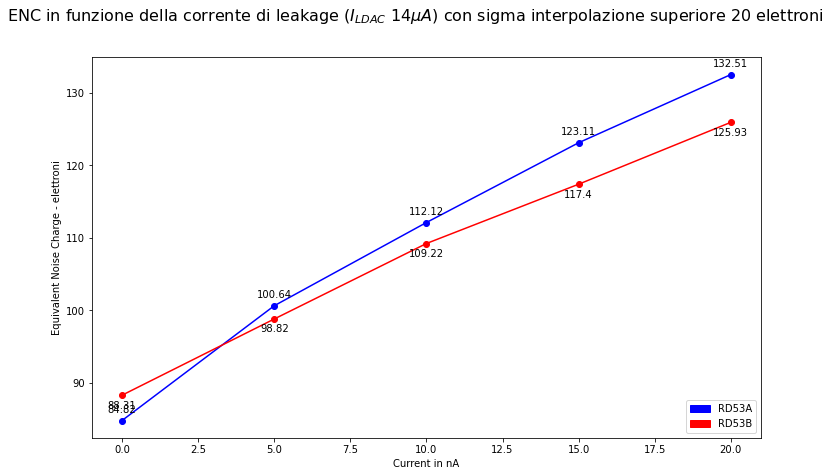

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12,7))

ax.plot(lkg, ENC_A, '-o', color ="blue")
ax.plot(lkg, ENC_B, '-o', color = "red")
ax.set_xlabel("Current in nA")
ax.set_ylabel("Equivalent Noise Charge - elettroni")



blue_patch = mpatches.Patch(color='blue', label="RD53A")
red_patch = mpatches.Patch(color='red', label="RD53B")

ax.legend(loc="lower right", handles=[blue_patch, red_patch])

for i, txt in enumerate(ENC_A):        
    ax.annotate(round(txt,2), #text
                (lkg[i], ENC_A[i]), #point
               textcoords = "offset points", #positioning
               xytext= (0,8), #txt distance from the point
               ha='center') #horizontal alignment
    

for i, txt in enumerate(ENC_B):  
    ax.annotate(round(txt,2), #text
                (lkg[i], ENC_B[i]), #point
               textcoords = "offset points", #positioning
               xytext= (0,-13), #txt distance from the point
               ha='center') #horizontal alignment

fig.suptitle("ENC in funzione della corrente di leakage ($I_{LDAC} ~ 14 \mu A$) con sigma interpolazione superiore 20 elettroni", fontsize=16)
plt.savefig('ENC in funzione della corrente di Leakage 1500 elettroni sigma interpolazione superiore 20 elettroni.png', bbox_inches='tight')
plt.show()


In [12]:
dev_A = []
for i in sigmasA:
    dev_A.append(50*np.std(np.asarray(i)))
dev_A

[11.388253535731645,
 10.89157551658896,
 11.609027286514106,
 11.848151617758509,
 12.425599775908589]

In [13]:
dev_B = []
for i in sigmasB:
    dev_B.append(50*np.std(np.asarray(i)))
dev_B

[9.204089109972113,
 9.335863670818556,
 10.389024022029957,
 9.573477442187704,
 10.298489100032308]

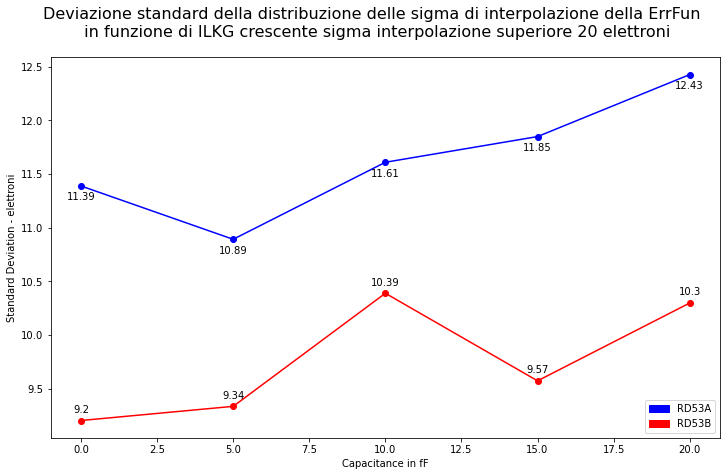

In [14]:
fig1, ax1 = plt.subplots(1,1, figsize=(12,7))

ax1.plot(lkg, dev_A, '-o', color ="blue")
ax1.plot(lkg, dev_B, '-o', color = "red")
ax1.set_xlabel("Capacitance in fF")
ax1.set_ylabel("Standard Deviation - elettroni")

blue_patch = mpatches.Patch(color='blue', label="RD53A")
red_patch = mpatches.Patch(color='red', label="RD53B")

ax1.legend(loc="lower right", handles=[blue_patch, red_patch])

for i, txt in enumerate(dev_A):        
    ax1.annotate(round(txt,2), #text
                (lkg[i], dev_A[i]), #point
               textcoords = "offset points", #positioning
               xytext= (0,-14), #txt distance from the point
               ha='center') #horizontal alignment
    

for i, txt in enumerate(dev_B):  
    ax1.annotate(round(txt,2), #text
                (lkg[i], dev_B[i]), #point
               textcoords = "offset points", #positioning
               xytext= (0,8), #txt distance from the point
               ha='center') #horizontal alignment
fig1.suptitle("Deviazione standard della distribuzione delle sigma di interpolazione della ErrFun \n in funzione di ILKG crescente sigma interpolazione superiore 20 elettroni", fontsize=16)

plt.savefig('DevStd delle sigma ErrFun in funzione di ILKG crecente soglia 1500 elettroni sigma interpolazione superiore 20 elettroni.png', bbox_inches='tight')

plt.show()